In [1]:
import pandas as pd
import numpy as np

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve,\
    plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

from sklearn.base import BaseEstimator, TransformerMixin

from datetime import datetime
from xgboost import XGBClassifier, plot_importance
from xgboost import plot_tree

In [2]:
train1_df = pd.read_csv("datasets/train1.csv")
train2_df = pd.read_csv("datasets/train2.csv", sep=";")
print('train1 shape', train1_df.shape)
print('train2 shape', train2_df.shape)
train_df = pd.concat([train1_df, train2_df], axis=0)
print('train shape', train_df.shape)
train_df.head()

train1 shape (18563, 21)
train2 shape (18564, 21)
train shape (37127, 21)


,countryName,eprtrSectorName,EPRTRAnnexIMainActivityLabel,FacilityInspireID,facilityName,City,targetRelease,pollutant,reportingYear,MONTH,...,CONTINENT,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,REPORTER NAME,CITY ID
0,Germany,Mineral industry,Installations for the production of cement cli...,https://registry.gdi-de.org/id/de.ni.mu/062217...,Holcim (Deutschland) GmbH Werk Höver,Sehnde,AIR,Carbon dioxide (CO2),2015,10,...,EUROPE,15.118767,14.312541,21.419106,2.864895,4.924169,9.688206,2,Mr. Jacob Ortega,7cdb5e74adcb2ffaa21c1b61395a984f
1,Italy,Mineral industry,Installations for the production of cement cli...,IT.CAED/240602021.FACILITY,Stabilimento di Tavernola Bergamasca,TAVERNOLA BERGAMASCA,AIR,Nitrogen oxides (NOX),2018,9,...,EUROPE,19.661550,19.368166,21.756389,5.462839,7.864403,12.023521,1,Ashlee Serrano,cd1dbabbdba230b828c657a9b19a8963
2,Spain,Waste and wastewater management,Landfills (excluding landfills of inert waste ...,ES.CAED/001966000.FACILITY,COMPLEJO MEDIOAMBIENTAL DE ZURITA,PUERTO DEL ROSARIO,AIR,Methane (CH4),2019,2,...,EUROPE,12.729453,14.701985,17.103930,1.511201,4.233438,8.632193,2,Vincent Kemp,5011e3fa1436d15b34f1287f312fbada
3,Czechia,Energy sector,Thermal power stations and other combustion in...,CZ.MZP.U422/CZ34736841.FACILITY,Elektrárny Prunéřov,Kadaň,AIR,Nitrogen oxides (NOX),2012,8,...,EUROPE,11.856417,16.122584,17.537184,10.970301,10.298348,15.179215,0,Carol Gray,37a6d7a71c4f7c2469e4f01b70dd90c2
4,Finland,Waste and wastewater management,Urban waste-water treatment plants,http://paikkatiedot.fi/so/1002031/pf/Productio...,"TAMPEREEN VESI LIIKELAITOS, VIINIKANLAHDEN JÄT...",Tampere,AIR,Methane (CH4),2018,12,...,EUROPE,17.111930,20.201604,21.536012,11.772039,11.344078,16.039004,2,Blake Ford,471fe554e1c62d1b01cc8e4e5076c61a


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37127 entries, 0 to 18563
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   countryName                   37127 non-null  object 
 1   eprtrSectorName               37127 non-null  object 
 2   EPRTRAnnexIMainActivityLabel  37127 non-null  object 
 3   FacilityInspireID             37127 non-null  object 
 4   facilityName                  37127 non-null  object 
 5   City                          37127 non-null  object 
 6   targetRelease                 37127 non-null  object 
 7   pollutant                     37127 non-null  object 
 8   reportingYear                 37127 non-null  int64  
 9   MONTH                         37127 non-null  int64  
 10  DAY                           37127 non-null  int64  
 11  CONTINENT                     37127 non-null  object 
 12  max_wind_speed                37127 non-null  float64
 13  a

In [4]:
train_df.isnull().sum()

countryName                     0
eprtrSectorName                 0
EPRTRAnnexIMainActivityLabel    0
FacilityInspireID               0
facilityName                    0
City                            0
targetRelease                   0
pollutant                       0
reportingYear                   0
MONTH                           0
DAY                             0
CONTINENT                       0
max_wind_speed                  0
avg_wind_speed                  0
min_wind_speed                  0
max_temp                        0
avg_temp                        0
min_temp                        0
DAY WITH FOGS                   0
REPORTER NAME                   0
CITY ID                         0
dtype: int64

In [5]:
TARGET = "pollutant"

In [6]:
train_df[TARGET].value_counts()

Nitrogen oxides (NOX)    14617
Carbon dioxide (CO2)     13054
Methane (CH4)             9456
Name: pollutant, dtype: int64

<AxesSubplot:xlabel='pollutant', ylabel='count'>

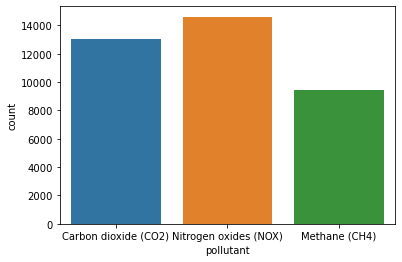

In [7]:
sns.countplot(data=train_df, x=TARGET)

In [8]:
train_df['countryName'].value_counts()

Germany           5055
United Kingdom    5054
France            4149
Spain             3912
Italy             3520
Poland            2431
Netherlands       1362
Finland           1282
Sweden            1166
Belgium           1081
Czechia           1073
Romania           1045
Austria            718
Ireland            695
Portugal           667
Switzerland        628
Denmark            564
Greece             528
Hungary            504
Bulgaria           475
Slovenia           277
Norway             193
Estonia            157
Luxembourg         116
Iceland             98
Cyprus              90
Lithuania           87
Croatia             77
Serbia              43
Slovakia            35
Malta               25
Latvia              20
Name: countryName, dtype: int64

In [9]:
train_df.describe(include = np.number).T

,count,mean,std,min,25%,50%,75%,max
reportingYear,37127.0,2012.951841,3.856172,2007.000000,2010.000000,2013.000000,2016.000000,2020.000000
MONTH,37127.0,6.487031,3.467030,1.000000,3.000000,7.000000,9.000000,12.000000
DAY,37127.0,14.540335,8.128336,1.000000,8.000000,15.000000,22.000000,28.000000
max_wind_speed,37127.0,15.510519,3.070188,8.062689,13.315477,15.503568,17.708038,22.991382
avg_wind_speed,37127.0,18.013596,2.313407,14.000287,16.007158,18.006838,20.013530,21.999973
min_wind_speed,37127.0,22.523559,3.064919,15.055647,20.361339,22.553985,24.713992,29.914367
max_temp,37127.0,9.452422,5.232214,-3.141464,5.855159,9.734382,13.287165,20.855885
avg_temp,37127.0,10.441560,5.094000,-0.199176,7.158428,10.733914,14.162492,19.999403
min_temp,37127.0,13.431015,5.225196,0.894827,9.866841,13.723792,17.235091,24.855425
DAY WITH FOGS,37127.0,2.228217,3.775751,0.000000,0.000000,1.000000,2.000000,19.000000


In [10]:
train_df.describe(include = np.object).T

/var/folders/pt/rrqbl2q559x5dkq3bsgd3gzh0000gn/T/ipykernel_5683/2960769666.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_df.describe(include = np.object).T


,count,unique,top,freq
countryName,37127,32,Germany,5055
eprtrSectorName,37127,9,Energy sector,13914
EPRTRAnnexIMainActivityLabel,37127,70,Thermal power stations and other combustion in...,12149
FacilityInspireID,37127,6306,https://data.ied_registry.omgeving.vlaanderen....,32
facilityName,37127,6704,Enel Produzione S.p.A.,137
City,37127,4514,--,1116
targetRelease,37127,1,AIR,37127
pollutant,37127,3,Nitrogen oxides (NOX),14617
CONTINENT,37127,1,EUROPE,37127
REPORTER NAME,37127,24686,Michael Brown,17


In [11]:
columns_to_remove = ['targetRelease', 'CONTINENT', 'REPORTER NAME', 'CITY ID']

In [12]:
train_df.drop(columns_to_remove, axis=1, inplace=True)

In [13]:
columns_to_apply_OHE = [
  'countryName', 
  'eprtrSectorName', 
  'EPRTRAnnexIMainActivityLabel', 
  'FacilityInspireID', 
  'facilityName', 
  'City',
  ]

In [14]:
def OHE(col_name,dataframe):
  _dummy_dataset = pd.get_dummies(dataframe[col_name], prefix = col_name)
  dataframe = pd.concat([dataframe,_dummy_dataset], axis = 1)
  return dataframe.drop([col_name], axis =1)

In [15]:
for col in columns_to_apply_OHE:
  train_df = OHE(col, train_df)

In [16]:
train_df[TARGET].unique()

array(['Carbon dioxide (CO2)', 'Nitrogen oxides (NOX)', 'Methane (CH4)'],
      dtype=object)

In [17]:
dict_target = {
  "Nitrogen oxides (NOX)": 0,
  "Carbon dioxide (CO2)": 1,
  "Methane (CH4)": 2,
}

In [18]:
train_df[TARGET] = train_df[TARGET].apply(lambda value: dict_target[value])

In [19]:
train_df[TARGET].unique()

array([1, 0, 2])

In [20]:
train_df

,pollutant,reportingYear,MONTH,DAY,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,...,City_Русе,City_Свищов,City_Сливен,City_Слънчево,City_София,City_Стамболийски,City_Стара Загора,City_Троян,City_Търговище,City_Харманли
0,1,2015,10,20,15.118767,14.312541,21.419106,2.864895,4.924169,9.688206,...,0,0,0,0,0,0,0,0,0,0
1,0,2018,9,21,19.661550,19.368166,21.756389,5.462839,7.864403,12.023521,...,0,0,0,0,0,0,0,0,0,0
2,2,2019,2,4,12.729453,14.701985,17.103930,1.511201,4.233438,8.632193,...,0,0,0,0,0,0,0,0,0,0
3,0,2012,8,6,11.856417,16.122584,17.537184,10.970301,10.298348,15.179215,...,0,0,0,0,0,0,0,0,0,0
4,2,2018,12,22,17.111930,20.201604,21.536012,11.772039,11.344078,16.039004,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18559,0,2007,7,25,12.972697,15.703894,23.054179,13.769423,13.898824,16.315857,...,0,0,0,0,0,0,0,0,0,0
18560,1,2020,7,21,9.938614,15.537484,18.433252,15.422341,17.371004,18.625890,...,0,0,0,0,0,0,0,0,0,0
18561,0,2008,5,26,12.919380,16.680595,19.082165,13.045298,15.043109,18.692182,...,0,0,0,0,0,0,0,0,0,0
18562,1,2008,11,18,11.508290,15.439616,23.106673,1.972343,1.958249,5.721142,...,0,0,0,0,0,0,0,0,0,0


In [21]:
dev_df_X = train_df.drop(TARGET, axis = 1)
dev_df_y = train_df[[TARGET]]
X_train, X_test, y_train, y_test = train_test_split(dev_df_X, dev_df_y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(29701, 17645) (7426, 17645) (29701, 1) (7426, 1)


In [22]:
%%time
model: XGBClassifier = XGBClassifier(
    max_depth=2,
    min_child_weight=100,
    random_state=42,
    use_label_encoder=False
)

eval_set = [(X_test, y_test.values.ravel())]
model.fit(
    X_train,
    y_train.values.ravel(),
    eval_set=eval_set,
    verbose=True,
    eval_metric="auc",
    early_stopping_rounds=10
)

Error: Canceled future for execute_request message before replies were done

In [ ]:
dt = DecisionTreeClassifier(
  max_depth=9, #cantidad de preguntas que permitimos
  min_samples_leaf=100, #cantidad minima de obs en corte
  random_state=42,
)

In [ ]:
dt.fit(
  X_train, y_train
)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=100, random_state=42)

In [ ]:
top_features = pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)
top_features.to_frame()

,0
"EPRTRAnnexIMainActivityLabel_Landfills (excluding landfills of inert waste and landfills, which were definitely closed before 16.7.2001 or for which the after-care phase required by the competent authorities according to Article 13 of Council Directive 1999/31/EC of 26 April 1999 on the landfill of waste has expired)",0.645972
eprtrSectorName_Intensive livestock production and aquaculture,0.178770
EPRTRAnnexIMainActivityLabel_Installations for the disposal of non-hazardous waste,0.047126
EPRTRAnnexIMainActivityLabel_Underground mining and related operations,0.035835
"EPRTRAnnexIMainActivityLabel_Installations for the manufacture of glass, including glass fibre",0.033324
City_--,0.017921
EPRTRAnnexIMainActivityLabel_Urban waste-water treatment plants,0.013823
countryName_Poland,0.006412
"EPRTRAnnexIMainActivityLabel_Installations for the manufacture of ceramic products by firing, in particular roofing tiles, bricks, refractory bricks, tiles, stoneware or porcelain",0.005366
EPRTRAnnexIMainActivityLabel_Installations for the incineration of non-hazardous waste in the scope of Directive 2000/76/EC of the European Parliament and of the Council of 4 December 2000 on the incineration of waste,0.004619


In [ ]:
#3. evaluar el modelo
text_tree = export_graphviz(
  decision_tree = dt,
  out_file=None,
  #max_depth=None,
  feature_names=X_train.columns,
  class_names=['0','1', '2'],
  filled=True,
  impurity=True,
  proportion=True,
  rotate=True,
  rounded=True,
  precision=5
)

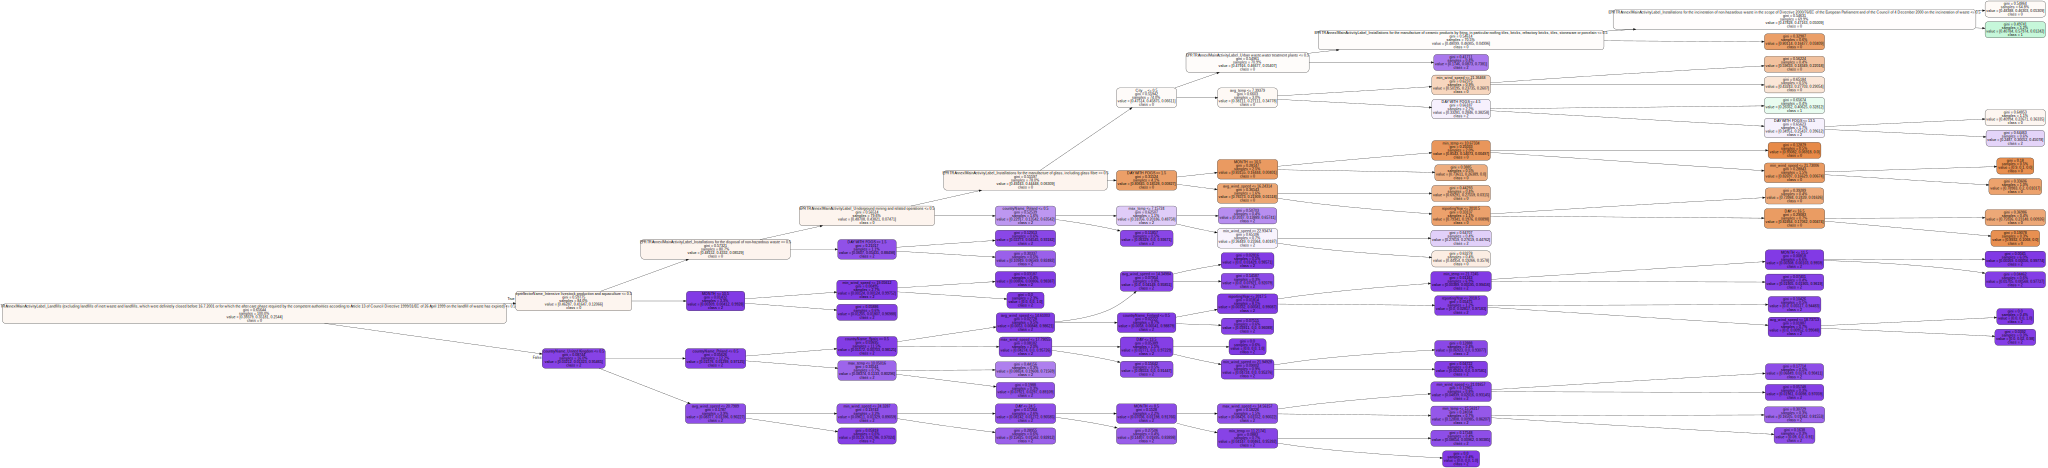

In [ ]:
graphviz.Source(text_tree)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
print('f1_score', f1_score(y_test, y_pred, average='macro'))


f1_score 0.566054408586517


In [ ]:
confusion_matrix = pd.crosstab(y_pred, y_test[TARGET])
confusion_matrix

pollutant,0,1,2
row_0,,,
0,2690,2309,292
1,154,246,15
2,77,50,1593


In [ ]:
y_pred_train = dt.predict(X_train)

In [ ]:
print(classification_report(y_train, y_pred_train, target_names=['0', '1', '2']))

              precision    recall  f1-score   support

           0       0.50      0.92      0.65     11696
           1       0.57      0.09      0.16     10449
           2       0.93      0.83      0.87      7556

    accuracy                           0.60     29701
   macro avg       0.67      0.61      0.56     29701
weighted avg       0.63      0.60      0.53     29701

